Problem Statement: ABC Company wants to perform text analysis for one of its dataset.
The dataset has been taken from Kaggle. (https://www.kaggle.com/crowdflower/twitter-airline-sentiment/home)
This dataset has tweets about six US Airlines along with their sentiments: positive, negative, and neutral. You are provided with this dataset named “Tweets.csv”. It has tweets in ‘text’ column and sentiments in “airline_sentiment” column.
Objective: 
Retrieve all tags starting from “@” in the entire dataset and save in a file called
“References.txt”. Extract all noun phrases from the dataset and save them in different lines in a file named “Noun Phrases for <airline_sentiment> Review .txt” (You can choose your own grammar for noun phrase).
Here <airline_sentiment> will have three different values: positive, negative, and neutral. Hence, three files will be created.

In [19]:
import pandas as pd
df=pd.read_csv("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Demo Datasets/Lesson 11/Tweets.csv")
df=df[['text','airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [20]:
# we will iterate thro' dataset using regex,find the relevant tweets
import re
r=re.compile(r"([@])(\w+)\b")
AllReferences=map(lambda x: r.findall(x),df['text'])
              
import itertools # itertools module returns efficient iterators
AllUniqueReferencesCombined=set(list(itertools.chain.from_iterable(AllReferences)))      
References=map(lambda x:x[0]+x[1],AllUniqueReferencesCombined)
# the result is stored in filename references.txt
file=open("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Demo Datasets/Lesson 11/References.txt",'a')
for each in References:
    file.write(each+"\n")
file.close()   

In [21]:
# let's extract all noun phrases and save them in file named "Noun Phrases for left caret airline_sentiment right caret Review.txt"
import nltk
def GetNounPhrases(s):
    try:
        sentences=nltk.sent_tokenize(s)
        sentences=[nltk.word_tokenize(sent)for sent in sentences]
        sentences=[nltk.pos_tag(Sent)for sent in sentences]
    except:
        return[]
    else:
# here left caret airline_sentiment right caret has 3 differnt values positive, negative and neutarl so 3 files will b created.
        grammar=r"NP:{<DT><NN|NNS|NNP|NNPS>*<NN|NNS|NNP|NNPS>}"
            
        cp=nltk.RegexpParser(grammar)
            # we will iterate thro' all leaf nodes and assign them to noun_phrases variables
        noun_phrases_list=[[''.join(leaf[0]for leaf in tree.leaves())
                               for tree in cp.parse(sent).subtrees()
                               if tree.label()=='NP']
                               for sent in sentences]
        return noun_phrases_list
# this means that functions in itertools operate on iterators to produce more complex iterators.       
import itertools
for group, sub in df.groupby('airline_sentiment'):
    # using the map function we will get all noun phrases from the text.
    noun_phrase=map(lambda x: GetNounPhrases(x),sub['text'])
    # putting it into list
    noun_phrases=list(itertools.chain.from_iterable(noun_phrases))
    AllNounPhrases=set(list(itertools.chain.from_iterable(noun_phrases)))
    filename="Noun Phrases for "+str(group)+"Review. txt"
    file=open(filename,'a')
    for each in AllNounPhrases:
        file.write(each+"\n")
    file.close()
            

FOr output check References.txt in folder C:\Users\sharv\Documents\Post Graduate Program In Data Science-PurdueSimpliLearn\Course3-Machine Learning\Demo Datasets\Lesson 11

output file "Noun Phrases for positiveReview.txt ", "Noun Phrases for negativeReview ", "Noun Phrases for neutralReview " is saved in folder "C:\Users\sharv\Documents\Post Graduate Program In Data Science-PurdueSimpliLearn\Course2-Data Science With Python\Python Programs"

recap
1> import the dataset
2> extract the noun phrases


Problem Statement: ABC Company wants to perform some text analysis and make visualization for one it’s dataset. The dataset has been taken from Kaggle. (https://www.kaggle.com/crowdflower/twitter-airline-sentiment/home). This is a dataset having tweets about six US Airlines along with their sentiments: positive, negative, and neutral. You are provided with this dataset named “Tweets.csv”. It has tweets in ‘text’ column and sentiments in ‘airline_sentiment’ column.
Objective: 
Extract all verb phrases from their dataset and save them in different lines in a file named “Verb Phrases for <airline_sentiment> Review .txt” (You can choose your own grammar for noun phrase). Here <airline_sentiment> will have three different values: positive , negative, and neutral. Hence, three files will be created. For each sentiment, make a well labeledpie chart showing the distribution of noun phrases and verb phrases of that sentiment from the data set. Use the files created above to get the frequencies.

In [12]:
# Step 01

import pandas as pd
df=pd.read_csv('C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Demo Datasets/Lesson 11/Tweets.csv')
df=df[['text','airline_sentiment']]

In [13]:
# Step 02
import nltk
def GetVerbPhrases(s):
    try:
        sentences = nltk.sent_tokenize(s)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
    except:
        return []
    else:
        grammar=r"VP:{<VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN><RB|RBR>*<RB|RBR>}"
        cp = nltk.RegexpParser(grammar)
        noun_phrases_list= [[' '.join(leaf[0] for leaf in tree.leaves())
                            for tree in cp.parse(sent).subtrees()
                            if tree.label()=='VP']
                            for sent in sentences]
        return noun_phrases_list

In [16]:
# Step 03

import itertools
for group,sub in df.groupby('airline_sentiment'):
    verb_phrases=map(lambda x: GetVerbPhrases(x),sub['text'])
    verb_phrases=list(itertools.chain.from_iterable(verb_phrases))
    AllVerbPhrases=set(list(itertools.chain.from_iterable(verb_phrases)))
    filename="Verb Phrases for "+str(group)+" Review1 .txt"
    file=open(filename,'a')
    for each in AllVerbPhrases:
        file.write(each+"\n")
    file.close()

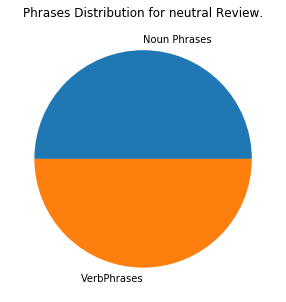

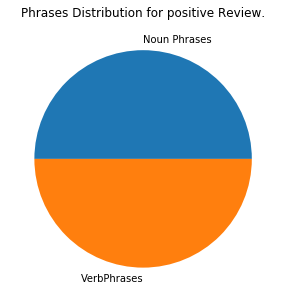

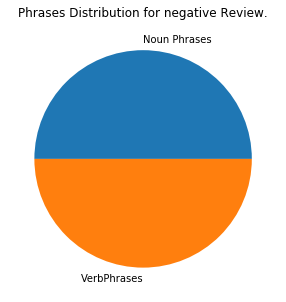

In [18]:
# Step 04
#Plotting a pie chart
def PlotPieChart(sentiment):
    noun_phrase_file="Noun Phrases for "+str(sentiment)+" Review .txt"
    verb_phrase_file="Verb Phrases for "+str(sentiment)+" Review .txt"
    noun_phrase_count=len(noun_phrase_file.split("\n"))
    verb_phrase_count=len(verb_phrase_file.split("\n"))
    counts=[noun_phrase_count,verb_phrase_count]
    labels=['Noun Phrases','VerbPhrases']
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(5,5))
    plt.pie(counts,labels=labels)
    plt.title("Phrases Distribution for "+str(sentiment)+" Review.")
    plt.show()
for each in df['airline_sentiment'].unique():
    PlotPieChart(each)

output file "Verb Phrases for positive Review1 " is saved in folder "C:\Users\sharv\Documents\Post Graduate Program In Data Science-PurdueSimpliLearn\Course2-Data Science With Python\Python Programs"

Airline Sentiment .
DESCRIPTION

ABC Company wants to perform some text analysis and visualization for one of its datasets. The dataset has been taken from Kaggle. (https://www.kaggle.com/crowdflower/twitter-airline-sentiment/home). This is a dataset that has tweets about six US Airlines along with their sentiments: positive, negative, and neutral. You are provided with a dataset named “Tweets.csv.” It has tweets in ‘text’ column and sentiments in ‘airline_sentiment’ column.
Objective: 
Extract all verb phrases from their dataset and save them in different lines in a file named “Verb Phrases for &lt;airline_sentiment&gt; Review .txt” (You can choose your own grammar for noun phrase). Here &lt;airline_sentiment&gt; will have three different values: positive , negative, and neutral. Hence, three files will be created. For each sentiment, make a well labeled pie chart showing the distribution of noun phrases and verb phrases of that sentiment from the data set. Use the files created above to get the frequencies.

check output files "nltk_unassisted.txt" and "wiki_corpus.txt" in the folder "C:\Users\sharv\Documents\Post Graduate Program In Data Science-PurdueSimpliLearn\Course3-Machine Learning\Demo Datasets\Lesson 11"